# TUTORIAL 4 : BEZIER CURVES

Let $n\geq 0$ be an integer. The Bernstein polynomials $B^n_i:[0,1]\to \mathbb{R}$ for $0\leq i \leq n$ are defined by
$$
\forall t\in [0,1]\quad B^n_i(t)=\Big( {n \atop i}\Big) t^i (1-t)^{n-i}
$$
The Bézier curve $P:[0,1]\to \mathbb{R}^d$ associated to $(n+1)$ points $P_0,\cdots P_n$ of $\mathbb{R}^d$ is defined by
$$
P(t) = \sum_{i=1}^n B^n_i(t) P_i
$$



## 1) Bernstein polynomial

The goal here is to create a function $\textit{Bernstein}(n,t)$ that returns an array of size $(n+1)\times len(t)$. The $i^{th}$ line contains Polynomial $B_N^i(t)$. Its length is the length of $t$.
You also have to plot the Bernstein polynomials. 

What properties on these on the set $\{B^n_i, 1\leq i \leq n\}$ do you observe ?

In [21]:
%matplotlib inline
import numpy as np
import os
os.environ['MPLBACKEND'] = 'Qt5Agg'
import matplotlib.pyplot as plt
from scipy.special import comb

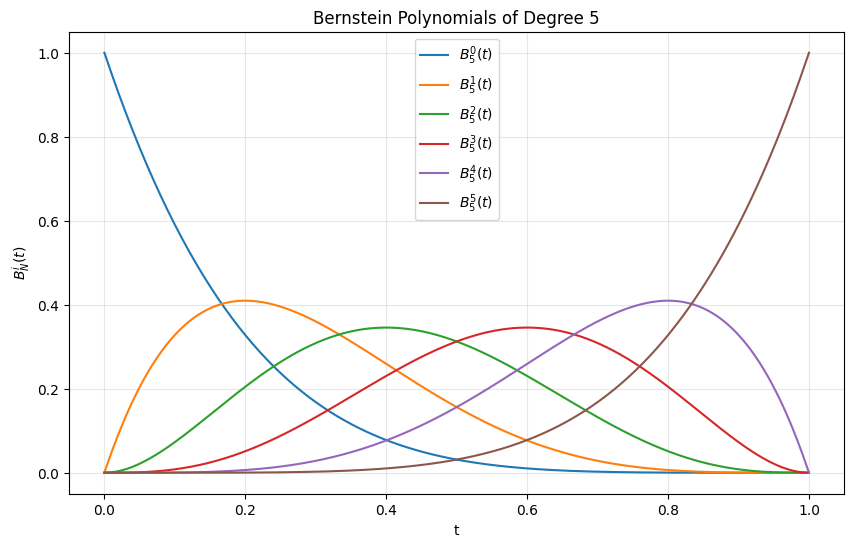

In [22]:


def Bernstein(N, t):

    t = np.asarray(t)
    BNt = np.zeros((N + 1, len(t)))
    
    for i in range(N + 1):
        BNt[i, :] = comb(N, i) * (t ** i) * ((1 - t) ** (N - i))
    
    return BNt

N = 5
t = np.linspace(0, 1, 500)
BNt = Bernstein(N, t)

plt.figure(figsize=(10, 6))
for i in range(N + 1):
    plt.plot(t, BNt[i, :], label=f'$B_{N}^{i}(t)$')

plt.xlabel('t')
plt.ylabel('$B_N^i(t)$')
plt.title(f'Bernstein Polynomials of Degree {N}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Berstein polynomials follow several key properties. First of all, they are non negative (evident based on the expression). Moreover, they form a partition of unity : $\sum_{i=0}^n B_n^i(t) = 1$ for all $t \in [0,1]$. This is because they can be understood/used as coefficients for interpolation between $n$ points. This partition is done using $t$ and $1-t$ symmetrically, thus $B_n^i(t) = B_n^{n-i}(1-t)$. Finally, each  $B_n^i(t)$ reaches their maximum at $t = i/n$.

## 2) Interactive acquisition of a control polygon

This section is done in tutorial4.py because interactive matplotlib acquisition is not supported in notebooks.

## 3) Create a function PlotBezierCurve
Given a control Polygon, the goal is to plot the Bezier curve using the parametric definition (matrix multiplication)

In [23]:
def PlotBezierCurve(Polygon):
    n = Polygon.shape[1] - 1  # degree of the curve
    t = np.linspace(0, 1, 500)
    BNt = Bernstein(n, t)
    Bezier = Polygon @ BNt

    plt.draw()
    plt.plot(Bezier[0, :], Bezier[1, :], 'b-', linewidth=2, label='Bezier curve')
    plt.legend()


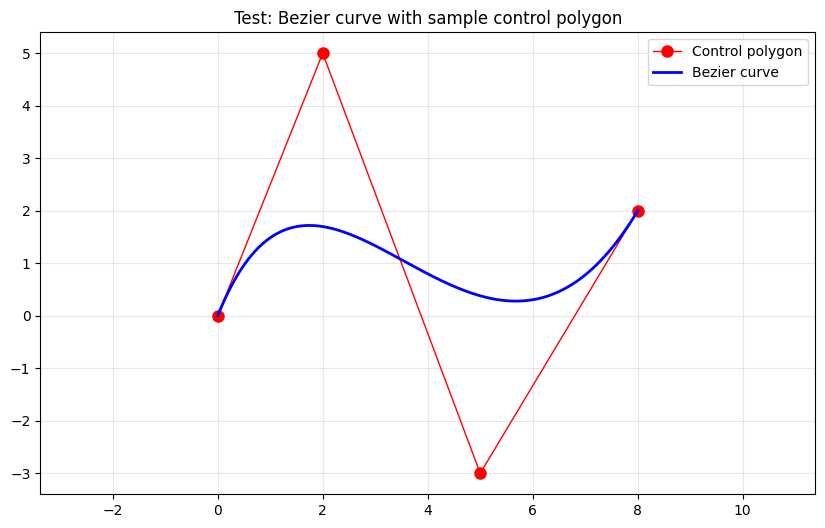

In [24]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
plt.title("Test: Bezier curve with sample control polygon")

Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])

plt.plot(Poly[0, :], Poly[1, :], 'or-', label='Control polygon', linewidth=1, markersize=8)

PlotBezierCurve(Poly)

plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()


## 4) De Casteljau Algorithm
This is the following algorithm 

Input : (n+1) points $P_0,\cdots, P_n$ of $\mathbb{R}^d$ and $t\in [0,1]$ 

intialisation: for $0\leq i \leq n$, set $P_i^0=P_i$

Repeat 

for j=1 to n 

$\quad$ for i=0 to n-j

$\quad \quad$ P_i^j = (1-t) P_i^{j-1} + t P_{i+1}^{j-1}

Return P_0^n.

In [25]:
def DeCasteljau(Polygon, t):
    
    t = np.asarray(t)
    is_scalar = t.ndim == 0
    if is_scalar:
        t = t.reshape(1)
    
    n = Polygon.shape[1] - 1  # degree
    d = Polygon.shape[0]      # dimension
    
    result = np.zeros((d, len(t)))
    
    for idx, t_val in enumerate(t):
        P = Polygon.astype(float).copy()
        
        for j in range(1, n + 1):
            for i in range(n - j + 1):
                P[:, i] = (1 - t_val) * P[:, i] + t_val * P[:, i + 1]
        
        result[:, idx] = P[:, 0]
    
    if is_scalar:
        return result[:, 0]
    return result


# 5) De Casteljau algorithm and the Bézier curve
Compare the output of the De Casteljau algorithm and the Bézier curve. What can you say ?

Maximum absolute difference between methods: 1.78e-15


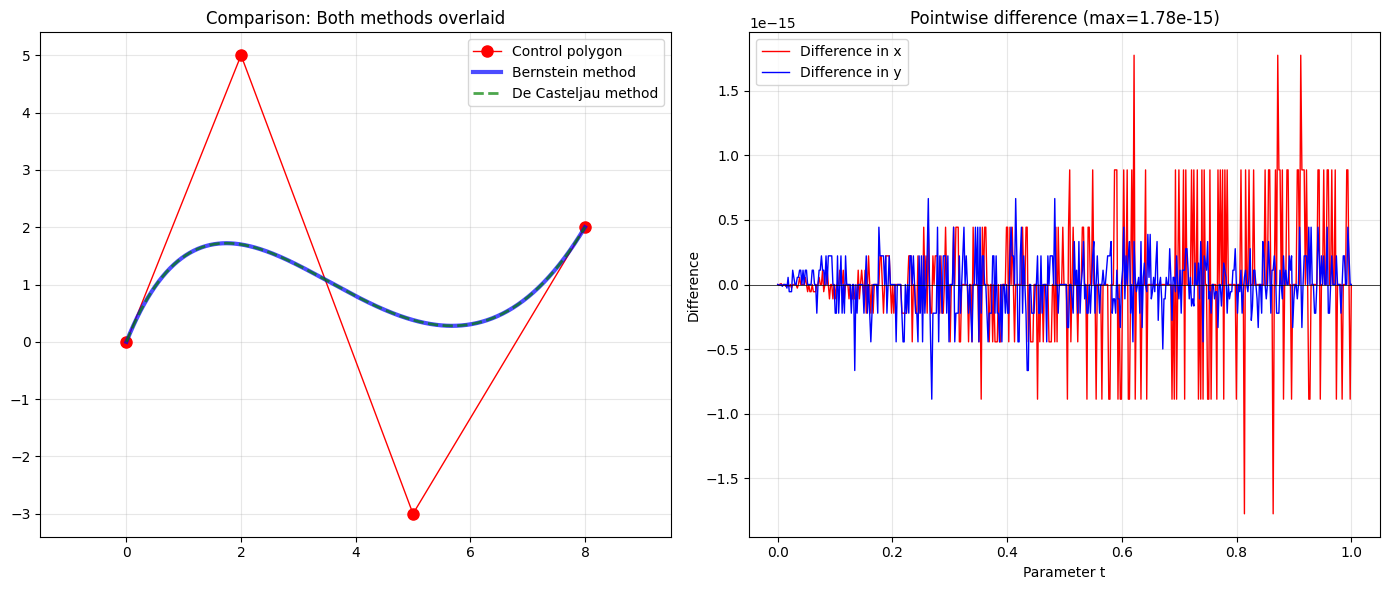

In [26]:

Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])

t_values = np.linspace(0, 1, 500)

n = Poly.shape[1] - 1
BNt = Bernstein(n, t_values)
curve_bernstein = Poly @ BNt

curve_decasteljau = DeCasteljau(Poly, t_values)

max_diff = np.max(np.abs(curve_bernstein - curve_decasteljau))

print(f"Maximum absolute difference between methods: {max_diff:.2e}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(Poly[0, :], Poly[1, :], 'or-', label='Control polygon', linewidth=1, markersize=8)
ax1.plot(curve_bernstein[0, :], curve_bernstein[1, :], 'b-', linewidth=3, 
         label='Bernstein method', alpha=0.7)
ax1.plot(curve_decasteljau[0, :], curve_decasteljau[1, :], 'g--', linewidth=2, 
         label='De Casteljau method', alpha=0.7)
ax1.set_xlim((-2, 10))
ax1.set_ylim((-5, 7))
ax1.grid(True, alpha=0.3)
ax1.set_title('Comparison: Both methods overlaid')
ax1.legend()
ax1.axis('equal')

diff = curve_bernstein - curve_decasteljau
ax2.plot(t_values, diff[0, :], 'r-', label='Difference in x', linewidth=1)
ax2.plot(t_values, diff[1, :], 'b-', label='Difference in y', linewidth=1)
ax2.set_xlabel('Parameter t')
ax2.set_ylabel('Difference')
ax2.set_title(f'Pointwise difference (max={max_diff:.2e})')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()


The two methods produce identical curves (up to numerical precision). This is expected, they are just two different methods of computing the same Bézier curve.
For a curve of dimension $d$, degree $n$ and $m$ evaluation points, we analyze the complexity of both methods:

Bernstein :
- Computing $B_n^i(t)$ for all $i$ and all $m$ points: $O(nm)$
- Matrix multiplication $P \cdot B$: $O(dnm)$
- Total: $O(dnm)$

De Casteljau :
- For each point: nested loops with $\sum_{j=1}^n (n-j+1) = O(n^2)$ operations
- For $m$ points: $O(mn^2)$
- Total: $O(dmn^2)$

For a low number of points, both methods are $O(n^2)$ and De Casteljau is preferred for stability since it is better conditioned. however, Berstein scales better  thanks to vectorization ($n$ times faster).

## 6) Plot together the two diagonals and the Bézier curve and comment the result.

The first ``diagonal'' is by definition the polygon whose vertices are $(P_0^i)_{0\leq i \leq n}$. 

The second ``diagonal'' is by definition the polygon whose vertices are $(P_i^{n-i})_{0\leq i \leq n}$. 



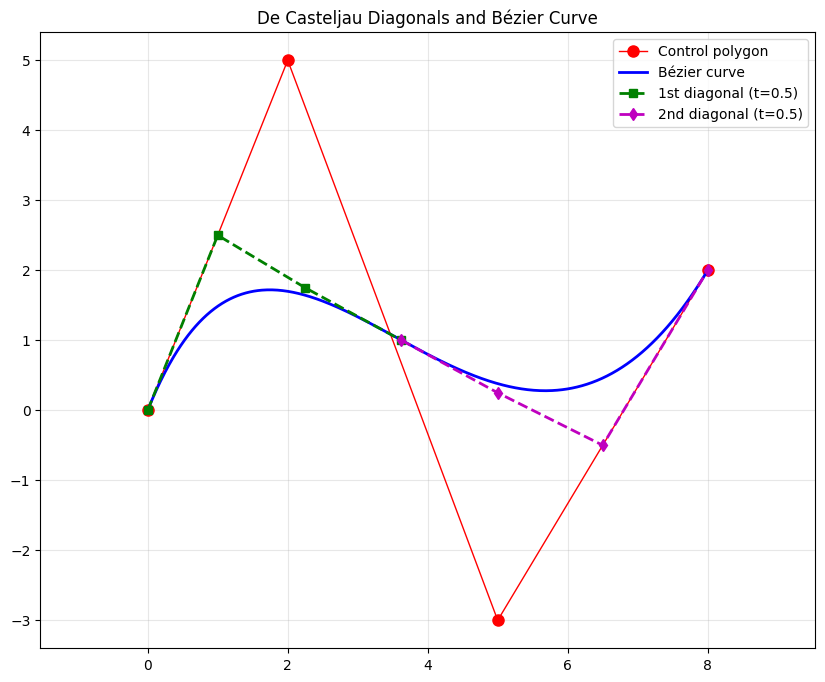

In [27]:
def DeCasteljauDiagonals(Polygon, t):
  
    n = Polygon.shape[1] - 1
    d = Polygon.shape[0]
    
    diag1 = np.zeros((d, n + 1))  
    diag2 = np.zeros((d, n + 1))  
    
    levels = [Polygon.astype(float).copy()]
    
    diag1[:, 0] = levels[0][:, 0]
    
    P = Polygon.astype(float).copy()
    for j in range(1, n + 1):
        for i in range(n - j + 1):
            P[:, i] = (1 - t) * P[:, i] + t * P[:, i + 1]
        levels.append(P[:, :n - j + 1].copy())  
        diag1[:, j] = P[:, 0]
    
    for i in range(n + 1):
        level_index = n - i  
        diag2[:, i] = levels[level_index][:, i]
    
    return diag1, diag2


Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])
t_param = 0.5

diag1, diag2 = DeCasteljauDiagonals(Poly, t_param)

t_values = np.linspace(0, 1, 500)
curve = DeCasteljau(Poly, t_values)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(Poly[0, :], Poly[1, :], 'or-', label='Control polygon', linewidth=1, markersize=8)
ax.plot(curve[0, :], curve[1, :], 'b-', linewidth=2, label='Bézier curve')
ax.plot(diag1[0, :], diag1[1, :], 'gs--', linewidth=2, markersize=6, label=f'1st diagonal (t={t_param})')
ax.plot(diag2[0, :], diag2[1, :], 'md--', linewidth=2, markersize=6, label=f'2nd diagonal (t={t_param})')

ax.set_xlim((-2, 10))
ax.set_ylim((-5, 7))
ax.grid(True, alpha=0.3)
ax.set_title('De Casteljau Diagonals and Bézier Curve')
ax.legend()
ax.axis('equal')
plt.show()


The two diagonals form control polygons that can exactly reproduce the left and right halves of the original curve.
 This is the basis for curve subdivision: splitting one Bézier curve into two smaller Bézier curves.

## 7) Subdivision algorithm
Starting from an initial polygon $\mathcal{P}_O:=[P_0,\cdots,P_n]$, imagine a sequence of polygons $(\mathcal{P}_k)_{k \geq 0}$ that converges to the Bézier curve and such that the number of vertices of $\mathcal{P}_k$ is $2^k n +1$. 

Plot at least $\mathcal{P}_0$, $\mathcal{P}_1$ and $\mathcal{P}_2$.

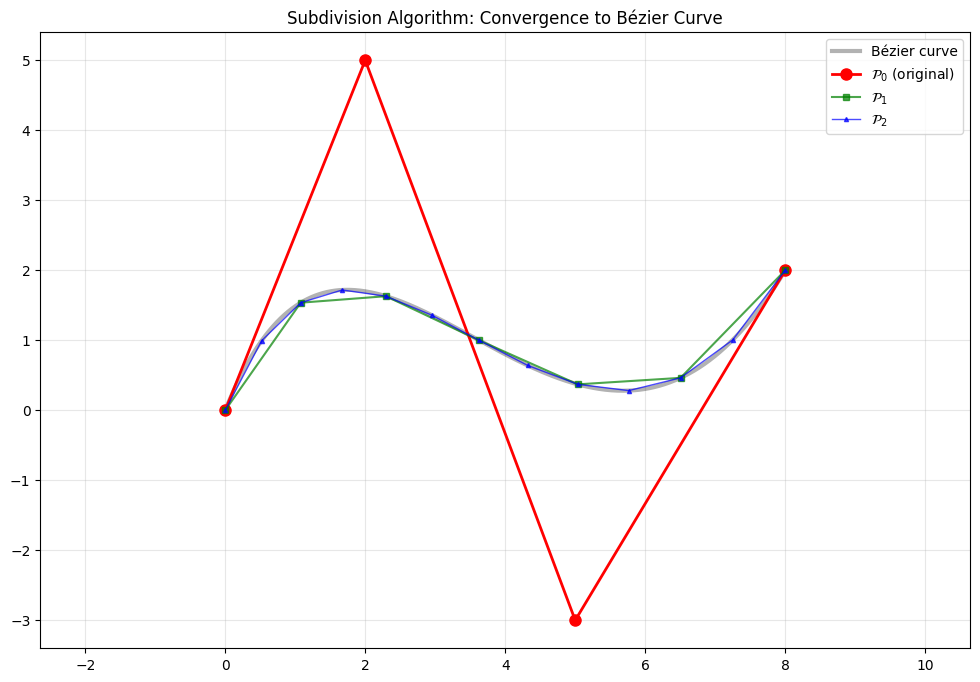

In [28]:
def SubdividePolygon(Polygon, k):
    n = Polygon.shape[1] - 1  # degree of the curve
    d = Polygon.shape[0]      # dimension
    
    num_vertices = (2**k) * n + 1
    
    t_values = np.linspace(0, 1, num_vertices)
    
    subdivision_poly = DeCasteljau(Polygon, t_values)
    
    return subdivision_poly


Poly = np.array([[0, 2, 5, 8], 
                 [0, 5, -3, 2]])

P0 = Poly  
P1 = SubdividePolygon(Poly, k=1)  
P2 = SubdividePolygon(Poly, k=2)  


t_values = np.linspace(0, 1, 500)
curve = DeCasteljau(Poly, t_values)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(curve[0, :], curve[1, :], 'k-', linewidth=3, label='Bézier curve', alpha=0.3)
ax.plot(P0[0, :], P0[1, :], 'o-', linewidth=2, markersize=8, label=r'$\mathcal{P}_0$ (original)', color='red')
ax.plot(P1[0, :], P1[1, :], 's-', linewidth=1.5, markersize=5, label=r'$\mathcal{P}_1$', color='green', alpha=0.7)
ax.plot(P2[0, :], P2[1, :], '^-', linewidth=1, markersize=3, label=r'$\mathcal{P}_2$', color='blue', alpha=0.7)

ax.set_xlim((-2, 10))
ax.set_ylim((-5, 7))
ax.grid(True, alpha=0.3)
ax.set_title('Subdivision Algorithm: Convergence to Bézier Curve')
ax.legend()
ax.axis('equal')
plt.show()


The algorithm repeatedly subdivides the Bézier curve using De Casteljau's algorithm at $t=0.5$. Each subdivision doubles the number of segments effectively splitting each Bézier curve in two.